In [33]:
!pip install kaggle -q


Importing the Dependencies

In [34]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Data Collection

In [35]:
kaggle_config = json.load(open("/content/kaggle (2).json"))

In [36]:
kaggle_config.keys()


dict_keys(['username', 'key'])

In [37]:

# Set the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']


In [38]:
# loading the dataset using kaggle api
!kaggle datasets download notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [39]:
!ls


'kaggle (2).json'   spotify-million-song-dataset.zip
 sample_data	    spotify_millsongdata.csv


In [40]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [41]:

# loading the dataset to a pandas dataframe
df = pd.read_csv("/content/spotify_millsongdata.csv")

Data Analysis

In [42]:
df.shape


(57650, 4)

In [43]:
df.head()


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [45]:
df.columns

Index(['artist', 'song', 'link', 'text'], dtype='object')

In [46]:
df.isnull().sum()


,0
artist,0
song,0
link,0
text,0


In [47]:
# Top artists and songs
top_artists = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artists)


Top 10 Artists:
artist
Donna Summer        191
Gordon Lightfoot    189
Bob Dylan           188
George Strait       188
Loretta Lynn        187
Alabama             187
Cher                187
Reba Mcentire       187
Chaka Khan          186
Dean Martin         186
Name: count, dtype: int64


In [48]:
#sample 10000 rows and drop link column
df = df.sample(10000)
df = df.drop('link', axis=1).reset_index(drop=True)

In [49]:
df.shape


(10000, 3)

In [50]:
df.head()


,artist,song,text
0,ABBA,Knowing Me Knowing You,No more carefree laughter \r\nSilence ever af...
1,Xentrix,Another Day,"Another day, you've no concerns but the desire..."
2,Amy Grant,Curious Thing,"There was this guy, he was down on his luck \..."
3,Nickelback,Sea Groove,Take away from me \r\nThat what you just gave...
4,Demi Lovato,Up,"[Intro] \r\nIf the weapon is your love, I got..."


In [51]:
# WordCloud for song lyrics
all_lyrics = " ".join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

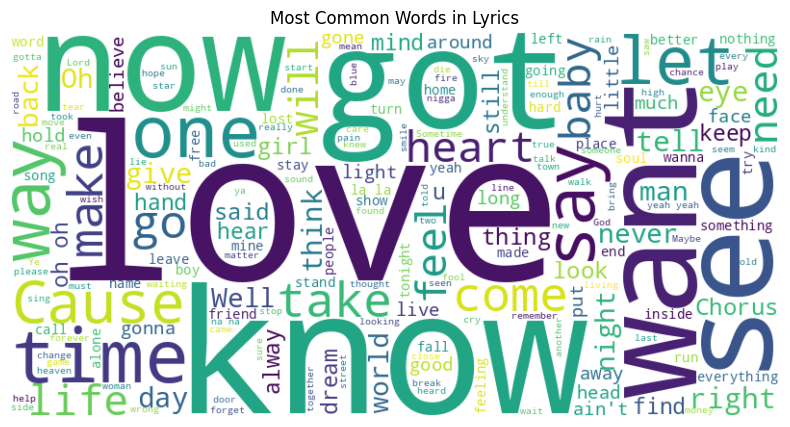

In [52]:
#WordCloud to visualize the most common words in the lyrics.
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Lyrics")
plt.show()

Data Preprocessing



In [53]:
# download nltk data
nltk.download('punkt') # used for splitting text into sentences or words
nltk.download('punkt_tab')
nltk.download('stopwords') #downloads the list of stopwords — words like "is," "the," "and," "but," which are usually ignored in text analysis because they are so common.
# Useful when you want to clean text and focus on important words only.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
stop_words = set(stopwords.words('english')) #From the NLTK stopwords corpus, you're getting all the English stopwords.


In [55]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = word_tokenize(text)  #Splits the cleaned lowercase text into individual words (tokens).
    tokens = [word for word in tokens if word not in stop_words]  #Filters out the boring/common words (stopwords like "is", "the", "a", etc.).
    return " ".join(tokens)

In [56]:
# Apply preprocessing to lyrics
df['cleaned_text'] = df['text'].apply(preprocess_text)

In [57]:
df.head()


,artist,song,text,cleaned_text
0,ABBA,Knowing Me Knowing You,No more carefree laughter \r\nSilence ever af...,carefree laughter silence ever walking empty h...
1,Xentrix,Another Day,"Another day, you've no concerns but the desire...",another day youve concerns desire burns anothe...
2,Amy Grant,Curious Thing,"There was this guy, he was down on his luck \...",guy luck truly povertys child well home car wo...
3,Nickelback,Sea Groove,Take away from me \r\nThat what you just gave...,take away gave nothing left heal nothing left ...
4,Demi Lovato,Up,"[Intro] \r\nIf the weapon is your love, I got...",intro weapon love got hands weapon love got ha...


In [58]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [59]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [60]:
# Recommendation Function
def recommend_songs(song_name, cosine_sim=cosine_sim, df=df, top_n=5):
    # Find the index of the song
    idx = df[df['song'].str.lower() == song_name.lower()].index
    if len(idx) == 0:
        return "Song not found in the dataset!"   # can be reworked to compare for songs not present in the dataset
    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    # Get song indices
    song_indices = [i[0] for i in sim_scores]

    # Return top n similar songs
    return df[['artist', 'song']].iloc[song_indices]

In [61]:
df["song"][2]


'Curious Thing'

In [62]:
# Example Recommendation
print("\nRecommendations for the song 'Blinded By Rainbows':")
recommendations = recommend_songs("For The First Time") # df["song"][2]
print(recommendations)


Recommendations for the song 'Blinded By Rainbows':
                  artist                                 song
7863        Carol Banawa                            I Believe
7963                Styx                           First Time
2079       Christy Moore  The First Time Ever I Saw Your Face
5539         Carly Simon                     Just Like You Do
7232  Olivia Newton-John              The Last Time You Loved
